In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('feature_time_48k_2048_load_1.csv')
data

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


In [3]:
data.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1


In [4]:
data.tail()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1
2299,0.19610,-0.24721,0.012209,0.063243,0.064396,-0.351762,0.226294,3.045244,5.274392,Normal_1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max       2300 non-null   float64
 1   min       2300 non-null   float64
 2   mean      2300 non-null   float64
 3   sd        2300 non-null   float64
 4   rms       2300 non-null   float64
 5   skewness  2300 non-null   float64
 6   kurtosis  2300 non-null   float64
 7   crest     2300 non-null   float64
 8   form      2300 non-null   float64
 9   fault     2300 non-null   object 
dtypes: float64(9), object(1)
memory usage: 179.8+ KB


In [6]:
data.describe()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,1.575079,-1.550994,0.015711,0.341601,0.342289,-0.042251,2.664444,4.173130,26.544769
std,1.578422,1.602706,0.006469,0.305279,0.304813,0.180774,4.411096,1.148349,29.209702
min,0.157300,-6.292600,0.003246,0.059140,0.061067,-1.089928,-0.803795,2.428511,3.484429
25%,0.456398,-2.174975,0.011236,0.135506,0.136374,-0.103426,-0.015164,3.260382,7.413359
50%,0.794510,-0.733700,0.013730,0.188551,0.190662,-0.002466,0.816970,3.921650,13.122811
75%,2.278425,-0.426987,0.018638,0.555589,0.555671,0.061093,3.902286,4.815876,39.911894
max,6.825900,-0.160220,0.038386,1.256577,1.256311,1.059512,30.385326,8.821577,313.742612


In [7]:
data.shape

(2300, 10)

In [8]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print()

max
[0.35986 0.46772 0.46855 ... 0.20131 0.19276 0.21425]

min
[-0.4189  -0.36111 -0.43809 ... -0.17837 -0.1888  -0.24721]

mean
[0.01784046 0.0222548  0.0204703  ... 0.01257147 0.0126077  0.01220909]

sd
[0.12274639 0.13248798 0.14965051 ... 0.06712848 0.06681348 0.06324296]

rms
[0.12400646 0.13431221 0.15100786 ... 0.06827939 0.06797658 0.06439551]

skewness
[-0.11857118  0.1746989   0.04033895 ... -0.1547541  -0.32696642
 -0.3517623 ]

kurtosis
[-0.04221924 -0.08154757 -0.27406894 ... -0.07140528  0.02366229
  0.22629434]

crest
[2.90194556 3.48233409 3.10281864 ... 3.04616094 3.15182075 3.04524353]

form
[6.95085499 6.03520239 7.37692616 ... 5.4312989  5.39167152 5.27439191]

fault
['Ball_007_1' 'Ball_014_1' 'Ball_021_1' 'IR_007_1' 'IR_014_1' 'IR_021_1'
 'OR_007_6_1' 'OR_014_6_1' 'OR_021_6_1' 'Normal_1']



In [9]:
print(data["fault"].value_counts())

Ball_014_1    230
IR_007_1      230
IR_014_1      230
OR_014_6_1    230
OR_021_6_1    230
Ball_007_1    230
Ball_021_1    230
OR_007_6_1    230
IR_021_1      230
Normal_1      230
Name: fault, dtype: int64


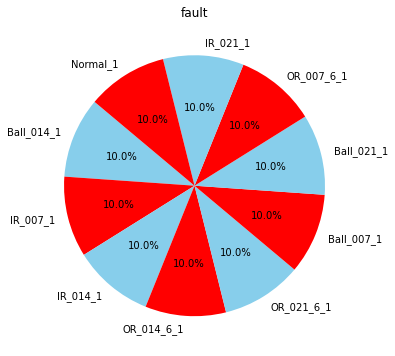

In [10]:
fault = data['fault'].value_counts()
fault_values = fault.values
labels = fault.index
plt.figure(figsize=(8, 6))
plt.pie(fault, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'red'])
plt.title('fault')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [12]:
X = data.drop('fault', axis=1)  
y = data['fault']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085
...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672


In [14]:
y

0       Ball_007_1
1       Ball_007_1
2       Ball_007_1
3       Ball_007_1
4       Ball_007_1
           ...    
2295      Normal_1
2296      Normal_1
2297      Normal_1
2298      Normal_1
2299      Normal_1
Name: fault, Length: 2300, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [18]:
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, random_state=420),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for name, clf in classifiers.items():
    clf.fit(X_train_res, y_train_res)                   
    y_pred = clf.predict(X_test_scaled)            
    accuracy = accuracy_score(y_test, y_pred)       
    print(f'{name} Accuracy: {accuracy:.4f}')    
    print(classification_report(y_test, y_pred))  

Random Forest Accuracy: 0.9674
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.92      0.94      0.93        50
           2       0.96      0.90      0.93        49
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        47
           5       0.95      1.00      0.97        39
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        54
           8       0.91      0.93      0.92        54
           9       1.00      1.00      1.00        45

    accuracy                           0.97       460
   macro avg       0.97      0.97      0.97       460
weighted avg       0.97      0.97      0.97       460

AdaBoost Accuracy: 0.3043
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00        50
           2       0.

In [20]:
stacking_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=500, max_depth=10, random_state=420)),
        ('xgb', XGBClassifier(n_estimators=200, max_depth=6, random_state=420, use_label_encoder=False, eval_metric='mlogloss')),
        ('svc', SVC(probability=True, random_state=420))
    ],
    final_estimator=LogisticRegression()
)

In [21]:
voting_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=500, max_depth=10, random_state=420)),
        ('xgb', XGBClassifier(n_estimators=200, max_depth=6, random_state=420, use_label_encoder=False, eval_metric='mlogloss')),
        ('svc', SVC(probability=True, random_state=420))
    ],
    voting='soft'
)

In [22]:
from sklearn.model_selection import cross_val_score
stacking_model.fit(X_train_res, y_train_res)
stacking_preds = stacking_model.predict(X_test_scaled)
stacking_accuracy = accuracy_score(y_test, stacking_preds)
print(f"Stacking Model Accuracy: {stacking_accuracy:.4f}")
print(classification_report(y_test, stacking_preds))

voting_model.fit(X_train_res, y_train_res)
voting_preds = voting_model.predict(X_test_scaled)
voting_accuracy = accuracy_score(y_test, voting_preds)
print(f"Voting Model Accuracy: {voting_accuracy:.4f}")
print(classification_report(y_test, voting_preds))

# Cross-validation for more robust evaluation
cv_scores = cross_val_score(stacking_model, X_train_res, y_train_res, cv=5)
print(f"Stacking Model Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

Stacking Model Accuracy: 0.9674
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.94      0.94      0.94        50
           2       0.94      0.90      0.92        49
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        47
           5       0.95      1.00      0.97        39
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        54
           8       0.93      0.93      0.93        54
           9       1.00      1.00      1.00        45

    accuracy                           0.97       460
   macro avg       0.97      0.97      0.97       460
weighted avg       0.97      0.97      0.97       460

Voting Model Accuracy: 0.9696
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.96      0.94      0.95        50
           2    

In [23]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=72)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, cv=3, n_jobs=-1, scoring='accuracy', random_state=72)
random_search.fit(X_train_res, y_train_res)

best_params = random_search.best_params_

optimized_rf_params = {
    'n_estimators': 500,
    'max_depth': best_params['max_depth'],
    'min_samples_split': best_params['min_samples_split'],
    'min_samples_leaf': best_params['min_samples_leaf'],
    'max_features': best_params['max_features'],
    'bootstrap': best_params['bootstrap'],
    'class_weight': best_params['class_weight']
}

rf_model = RandomForestClassifier(**optimized_rf_params, random_state=72)
rf_model.fit(X_train_res, y_train_res)

y_pred = rf_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Random Forest Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_pred))


Optimized Random Forest Test Accuracy: 0.9652
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.92      0.94      0.93        50
           2       0.94      0.90      0.92        49
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        47
           5       0.95      1.00      0.97        39
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        54
           8       0.91      0.91      0.91        54
           9       1.00      1.00      1.00        45

    accuracy                           0.97       460
   macro avg       0.97      0.97      0.97       460
weighted avg       0.97      0.97      0.97       460



In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=42)
def decode_rf_params(binary_solution):
    n_estimators = int(100 + binary_solution[0:4].dot(2**np.arange(4)[::-1]) * 25)
    max_depth = int(5 + binary_solution[4:7].dot(2**np.arange(3)[::-1]))
    return {'n_estimators': n_estimators, 'max_depth': max_depth}
def decode_xgb_params(binary_solution):
    n_estimators = int(100 + binary_solution[0:4].dot(2**np.arange(4)[::-1]) * 25)
    max_depth = int(3 + binary_solution[4:7].dot(2**np.arange(3)[::-1]))
    return {'n_estimators': n_estimators, 'max_depth': max_depth, 'eval_metric': 'mlogloss', 'use_label_encoder': False}
def decode_svc_params(binary_solution):
    C = 0.1 + binary_solution[0:4].dot(2**np.arange(4)[::-1]) * 0.5
    gamma = 0.01 + binary_solution[4:8].dot(2**np.arange(4)[::-1]) * 0.05
    return {'C': C, 'gamma': gamma, 'probability': True}
def fitness_function_rf(binary_solution):
    params = decode_rf_params(binary_solution)
    model = RandomForestClassifier(**params, random_state=72)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    return accuracy_score(y_val, predictions)
def fitness_function_xgb(binary_solution):
    params = decode_xgb_params(binary_solution)
    model = XGBClassifier(**params, random_state=72)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    return accuracy_score(y_val, predictions)

def fitness_function_svc(binary_solution):
    params = decode_svc_params(binary_solution)
    model = SVC(**params, random_state=72)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    return accuracy_score(y_val, predictions)
def binary_gwo(fitness_func, num_wolves=5, num_features=11, max_iter=10):
    wolves = np.random.randint(2, size=(num_wolves, num_features))
    alpha_wolf = np.zeros(num_features)
    alpha_score = float('-inf')
    for iter in range(max_iter):
        for i in range(num_wolves):
            fitness = fitness_func(wolves[i, :])
            if fitness > alpha_score:
                alpha_score = fitness
                alpha_wolf = wolves[i, :].copy()
        for i in range(num_wolves):
            for j in range(num_features):
                r1, r2 = np.random.rand(), np.random.rand()
                a = 2 * (1 - iter / max_iter)
                D_alpha = abs(r1 * alpha_wolf[j] - wolves[i, j])
                X_alpha = alpha_wolf[j] - a * D_alpha
                wolves[i, j] = 1 if 1 / (1 + np.exp(-X_alpha)) > 0.5 else 0
    return alpha_wolf, alpha_score
best_rf_params = decode_rf_params(binary_gwo(fitness_function_rf)[0])
best_xgb_params = decode_xgb_params(binary_gwo(fitness_function_xgb)[0])
best_svc_params = decode_svc_params(binary_gwo(fitness_function_svc)[0])
voting_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(**best_rf_params, random_state=72)),
        ('xgb', XGBClassifier(**best_xgb_params, random_state=72)),
        ('svc', SVC(**best_svc_params, random_state=72))
    ],
    voting='soft'
)
voting_model.fit(X_train_res, y_train_res)
y_pred = voting_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Voting Classifier Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_pred))

Optimized Voting Classifier Test Accuracy: 0.9674
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.96      0.92      0.94        50
           2       0.94      0.90      0.92        49
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        47
           5       0.95      1.00      0.97        39
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        54
           8       0.91      0.94      0.93        54
           9       1.00      1.00      1.00        45

    accuracy                           0.97       460
   macro avg       0.97      0.97      0.97       460
weighted avg       0.97      0.97      0.97       460



In [25]:
import pickle
pickle.dump(voting_model,open('model.pickle','wb'))
pickle.dump(scaler,open('scaler.pickle','wb'))